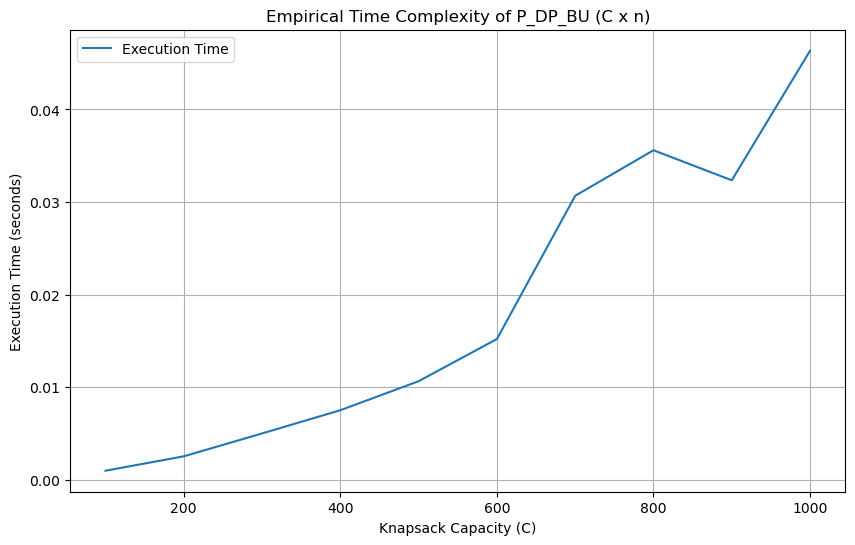

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the dynamic programming function
def P_DP_BU(C, W, P):
    S = [0] * (C + 1)
    start = min(W)

    for c in range(start):
        S[c] = 0

    for c in range(start, C + 1):
        S[c] = 0
        for i in range(len(W)):
            if c >= W[i]:
                Profit = P[i] + S[c - W[i]]
                if Profit > S[c]:
                    S[c] = Profit

    return S[C]

# Function to test the execution time for varying capacities and item counts
def measure_time(capacities, item_counts):
    times = []
    
    for C, n in zip(capacities, item_counts):
        W = np.random.randint(1, 100, size=n)  # Random weights between 1 and 100
        P = np.random.randint(1, 100, size=n)  # Random profits between 1 and 100

        start_time = time.time()
        P_DP_BU(C, W, P)
        end_time = time.time()
        
        times.append(end_time - start_time)
    
    return times

# Varying capacities and item counts
capacities = np.linspace(100, 1000, 10, dtype=int)  # Capacities from 100 to 1000
item_counts = np.linspace(10, 100, 10, dtype=int)   # Item counts from 10 to 100

# Measure execution time
times = measure_time(capacities, item_counts)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(capacities, times, label="Execution Time")
plt.xlabel("Knapsack Capacity (C)")
plt.ylabel("Execution Time (seconds)")
plt.title("Empirical Time Complexity of P_DP_BU (C x n)")
plt.grid(True)
plt.legend()
plt.show()


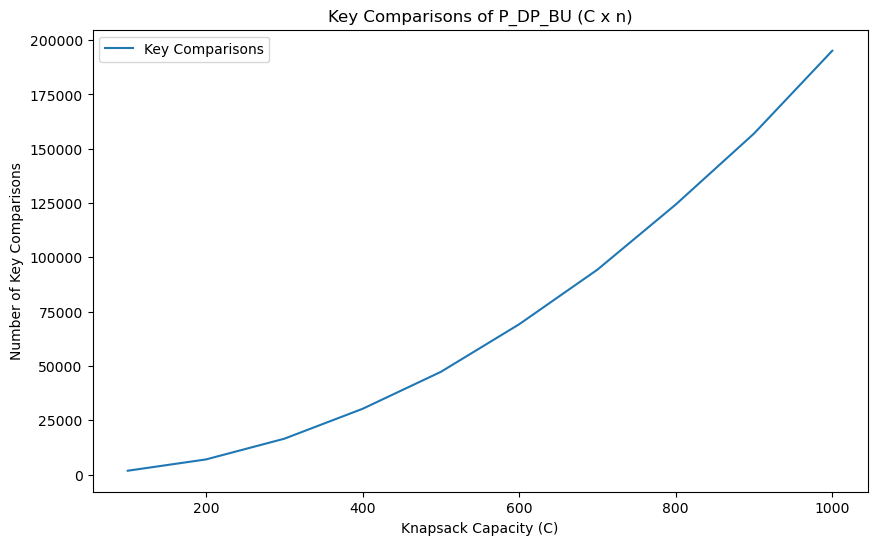

In [11]:
# Modify the P_DP_BU function to count key comparisons
def P_DP_BU_key_comparisons(C, W, P):
    S = [0] * (C + 1)
    start = min(W)
    comparisons = 0  # Variable to count key comparisons

    for c in range(start):
        S[c] = 0

    for c in range(start, C + 1):
        S[c] = 0
        for i in range(len(W)):
            comparisons += 1  # Each time we check if c >= W[i]
            if c >= W[i]:
                Profit = P[i] + S[c - W[i]]
                comparisons += 1  # Each time we check if Profit > S[c]
                if Profit > S[c]:
                    S[c] = Profit

    return comparisons

# Function to test key comparisons for varying capacities and item counts
def measure_key_comparisons(capacities, item_counts):
    key_comparisons = []
    
    for C, n in zip(capacities, item_counts):
        W = np.random.randint(1, 100, size=n)  # Random weights between 1 and 100
        P = np.random.randint(1, 100, size=n)  # Random profits between 1 and 100

        comparisons = P_DP_BU_key_comparisons(C, W, P)
        key_comparisons.append(comparisons)
    
    return key_comparisons

# Measure key comparisons
key_comparisons = measure_key_comparisons(capacities, item_counts)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(capacities, key_comparisons, label="Key Comparisons")
plt.xlabel("Knapsack Capacity (C)")
plt.ylabel("Number of Key Comparisons")
plt.title("Key Comparisons of P_DP_BU (C x n)")
plt.grid(False)
plt.legend()
plt.show()
